# Data Cleaning
* Removing duplicates, constants and quasi constants.
* Analyzing outliers.
* Encoding features
* Normalizing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, feature_selection, ensemble, model_selection, metrics

In [2]:
data = pd.read_csv('../data/processed/cleaned_data.csv')
meta = pd.read_csv('../data/meta_data.csv')

In [3]:
data.shape, meta.shape

((1459, 80), (81, 8))

In [4]:
df = data.copy(deep=True)
cols = df.columns
ord_enc = preprocessing.OrdinalEncoder()
df = ord_enc.fit_transform(df)
df = pd.DataFrame(df, columns=cols)

In [5]:
baseline_clf = ensemble.RandomForestClassifier()

In [6]:
var = feature_selection.VarianceThreshold()
df2 = var.fit_transform(df)
df.shape, df2.shape

((1459, 80), (1459, 80))

In [7]:
for i in df:
    print(f"{i} - {df[i].std()} - {df[i].var()}")

MSSubClass - 4.162166228933746 - 17.323627717276555
MSZoning - 0.6322336959553159 - 0.3997194463013187
LotFrontage - 99.2775437005284 - 9856.030683210325
LotArea - 300.3949496172714 - 90237.125755563
Street - 0.06401798854201533 - 0.004098302856965607
Alley - 0.39490370023266835 - 0.15594893245745317
LotShape - 1.4093670514251389 - 1.9863154856427903
LandContour - 0.7078845218876288 - 0.501100496328077
Utilities - 0.02618016347468683 - 0.0006854009595613265
LotConfig - 1.6229873771978658 - 2.6340880265436075
LandSlope - 0.2763223533709874 - 0.07635404297248082
Neighborhood - 6.009202763187591 - 36.11051784910138
Condition1 - 0.8688125110764754 - 0.7548351794030106
Condition2 - 0.25912867380844795 - 0.06714766958972503
BldgType - 1.1986183582927157 - 1.4366859688363247
HouseStyle - 1.9091410093433279 - 3.6448193935564603
OverallQual - 1.3831709441960875 - 1.9131618608682965
OverallCond - 1.1130788387738608 - 1.2389445013261664
YearBuilt - 28.848483632796523 - 832.2350079117288
YearRemod

In [8]:
meta.index = meta['col_name']

In [9]:
meta['variance'] = 0
meta['std'] = 0
meta['mean'] = 0
meta['median'] = 0
meta['mode'] = 0

In [10]:
for i in df:
    meta.loc[i, 'variance'] = df[i].var()
    meta.loc[i, 'std'] = df[i].std()
    meta.loc[i, 'mean'] = df[i].mean()
    meta.loc[i, 'median'] = df[i].median()
    meta.loc[i, 'mode'] = df[i].mode().values[0]

In [11]:
meta.shape

(81, 13)

In [12]:
meta

,col_name,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength,variance,std,mean,median,mode
col_name,,,,,,,,,,,,,
Id,Id,0,0.000000,int64,Id,non,none,none,0.000000,0.000000,0.000000,0,0.0
MSSubClass,MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong,17.323628,4.162166,4.163811,4,0.0
MSZoning,MSZoning,0,0.000000,object,MSZoning,nom,location,medium,0.399719,0.632234,3.028787,3,3.0
LotFrontage,LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium,9856.030683,99.277544,154.503084,135,79.0
LotArea,LotArea,0,0.000000,int64,LotArea,int,peripheral,medium,90237.125756,300.394950,491.631940,476,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,MoSold,0,0.000000,int64,MoSold,tem,house,medium,7.313409,2.704331,5.322824,5,5.0
YrSold,YrSold,0,0.000000,int64,YrSold,tem,house,strong,1.765023,1.328542,1.815627,2,3.0
SaleType,SaleType,0,0.000000,object,SaleType,nom,house,weak,2.410504,1.552580,7.512680,8,8.0


In [13]:
var_col = meta.sort_values('variance')[['col_name','variance']]
var_col

,col_name,variance
col_name,,
Id,Id,0.000000
Utilities,Utilities,0.000685
Street,Street,0.004098
PoolQC,PoolQC,0.019811
KitchenAbvGr,KitchenAbvGr,0.048581
...,...,...
BsmtFinSF1,BsmtFinSF1,40836.953348
1stFlrSF,1stFlrSF,42609.580068
BsmtUnfSF,BsmtUnfSF,51461.515781


In [14]:
cols = var_col[var_col['variance']<=0.1].index.tolist()
cols = [i for i in cols if i!='Id']

In [15]:
for i in df:
    if i in cols:
        print(i)
        print("---------")
        print(df[i].value_counts())
        print()

Street
---------
1.0    1453
0.0       6
Name: Street, dtype: int64

Utilities
---------
0.0    1458
1.0       1
Name: Utilities, dtype: int64

LandSlope
---------
0.0    1381
1.0      65
2.0      13
Name: LandSlope, dtype: int64

Condition2
---------
2.0    1444
1.0       6
4.0       2
7.0       2
0.0       2
5.0       1
6.0       1
3.0       1
Name: Condition2, dtype: int64

Heating
---------
1.0    1427
2.0      18
3.0       7
5.0       4
4.0       2
0.0       1
Name: Heating, dtype: int64

CentralAir
---------
1.0    1364
0.0      95
Name: CentralAir, dtype: int64

BsmtHalfBath
---------
0.0    1377
1.0      80
2.0       2
Name: BsmtHalfBath, dtype: int64

KitchenAbvGr
---------
1.0    1391
2.0      65
3.0       2
0.0       1
Name: KitchenAbvGr, dtype: int64

PoolArea
---------
0.0    1452
7.0       1
3.0       1
1.0       1
4.0       1
5.0       1
6.0       1
2.0       1
Name: PoolArea, dtype: int64

PoolQC
---------
3.0    1452
2.0       3
1.0       2
0.0       2
Name: PoolQC, dt

In [19]:
%%time
baseline_model = ensemble.RandomForestRegressor()
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y, random_state=0)
baseline_model.fit(X_tr, y_tr)
y_pred = baseline_model.predict(X_te)
baseline_model.score(X_te, y_te), metrics.mean_squared_error(y_te, y_pred), metrics.mean_absolute_error(y_te, y_pred)

Wall time: 6.33 s


(0.8822623068645712, 3412.59546, 40.57208219178082)

In [21]:
df.drop(cols, axis=1, inplace=True)
data.shape, df.shape

((1459, 80), (1459, 70))

In [22]:
%%time
baseline_model = ensemble.RandomForestRegressor()
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y, random_state=0)
baseline_model.fit(X_tr, y_tr)
y_pred = baseline_model.predict(X_te)
baseline_model.score(X_te, y_te), metrics.mean_squared_error(y_te, y_pred), metrics.mean_absolute_error(y_te, y_pred)

Wall time: 6.29 s


(0.8852126341430329, 3327.081015068493, 40.22512328767124)

In [25]:
sel_columns = X.columns

## Outlier detection

MSSubClass
-----------


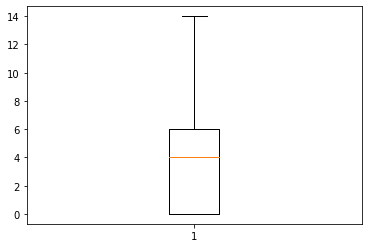


MSZoning
-----------


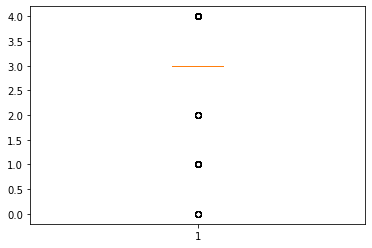


LotFrontage
-----------


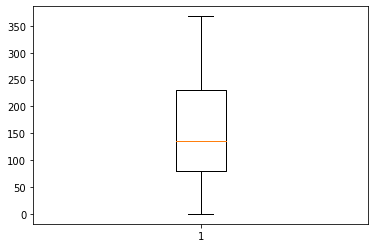


LotArea
-----------


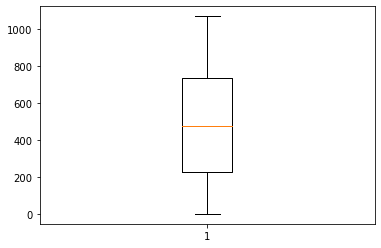


Alley
-----------


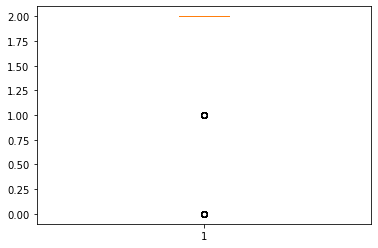


LotShape
-----------


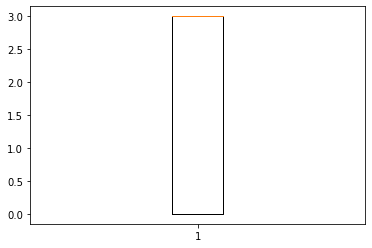


LandContour
-----------


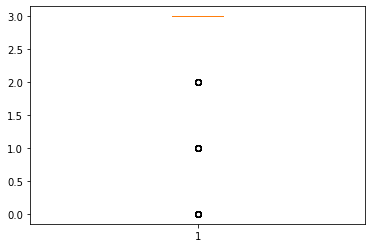


LotConfig
-----------


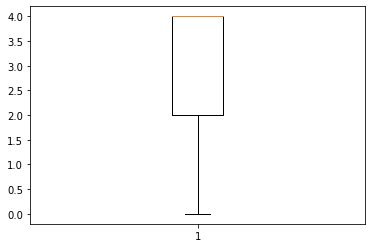


Neighborhood
-----------


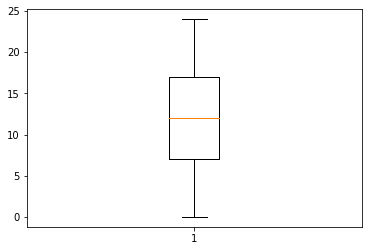


Condition1
-----------


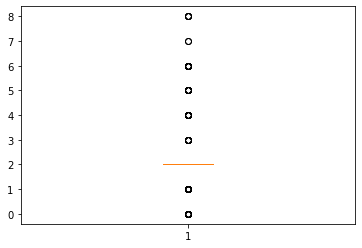


BldgType
-----------


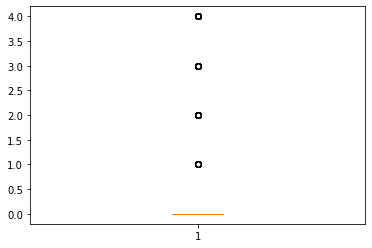


HouseStyle
-----------


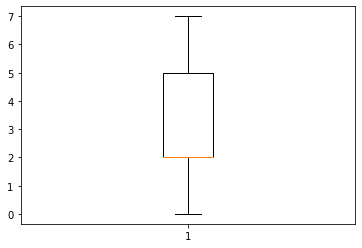


OverallQual
-----------


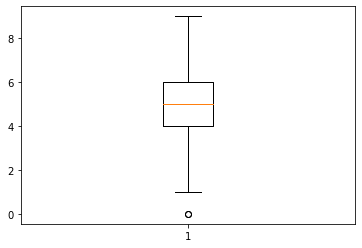


OverallCond
-----------


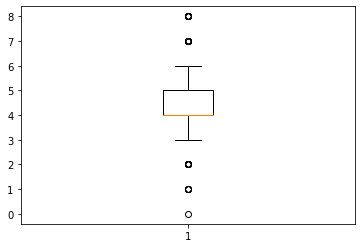


YearBuilt
-----------


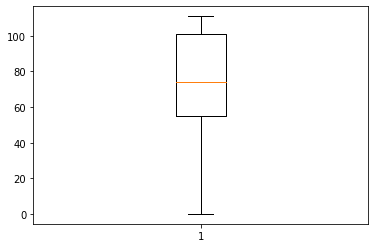


YearRemodAdd
-----------


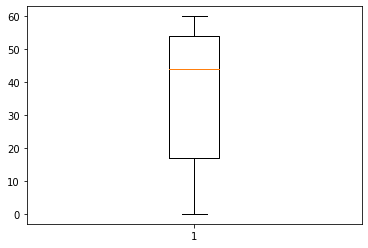


RoofStyle
-----------


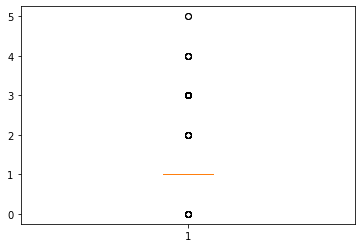


RoofMatl
-----------


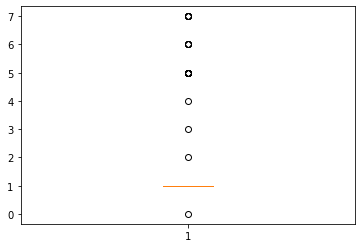


Exterior1st
-----------


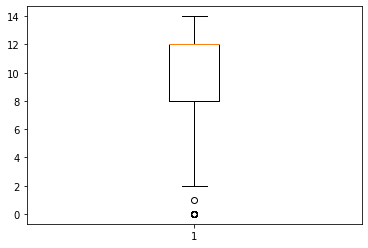


Exterior2nd
-----------


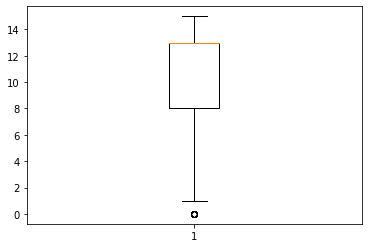


MasVnrType
-----------


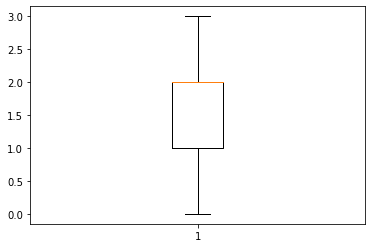


MasVnrArea
-----------


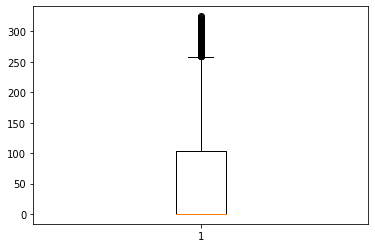


ExterQual
-----------


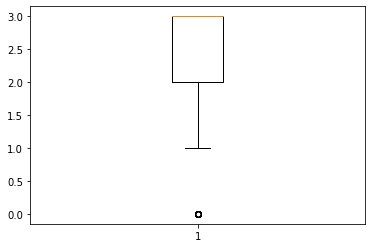


ExterCond
-----------


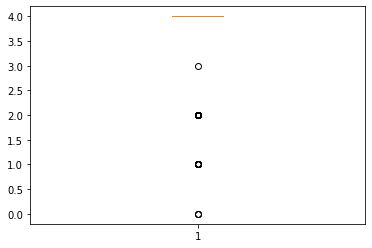


Foundation
-----------


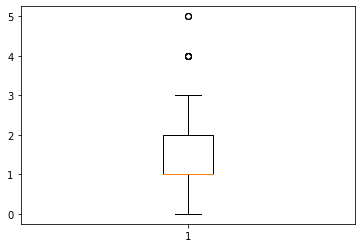


BsmtQual
-----------


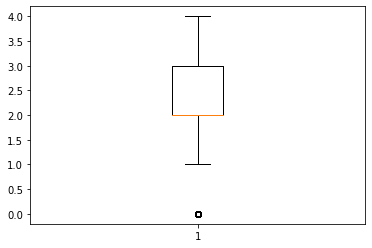


BsmtCond
-----------


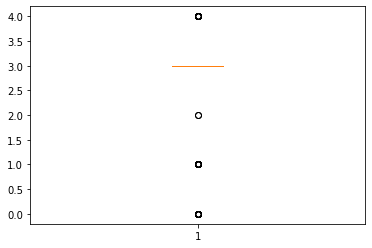


BsmtExposure
-----------


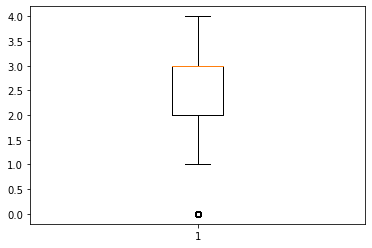


BsmtFinType1
-----------


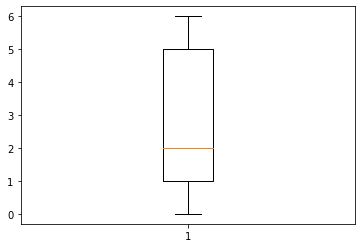


BsmtFinSF1
-----------


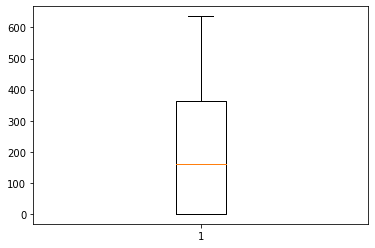


BsmtFinType2
-----------


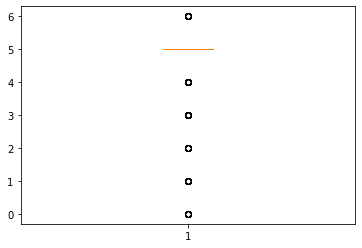


BsmtFinSF2
-----------


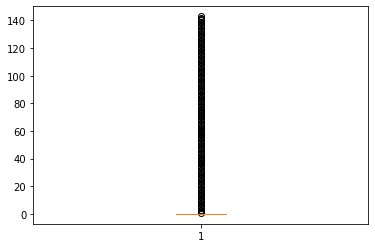


BsmtUnfSF
-----------


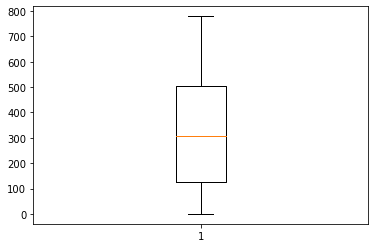


TotalBsmtSF
-----------


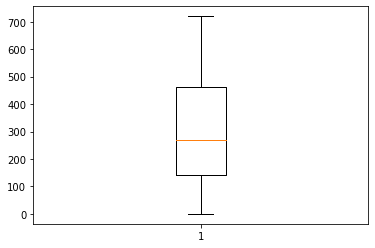


HeatingQC
-----------


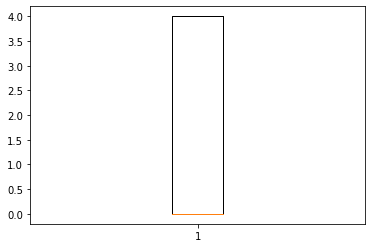


Electrical
-----------


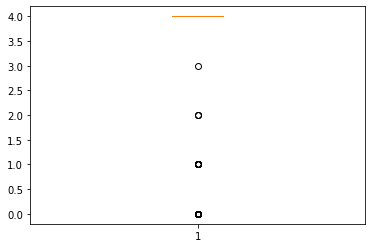


1stFlrSF
-----------


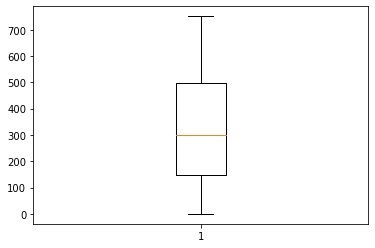


2ndFlrSF
-----------


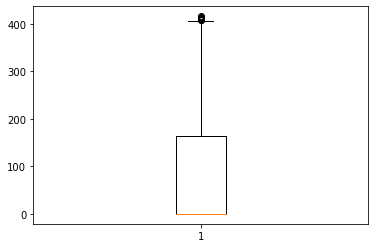


LowQualFinSF
-----------


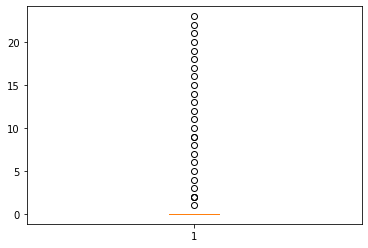


GrLivArea
-----------


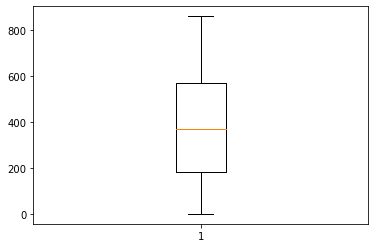


BsmtFullBath
-----------


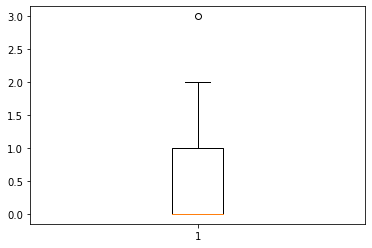


FullBath
-----------


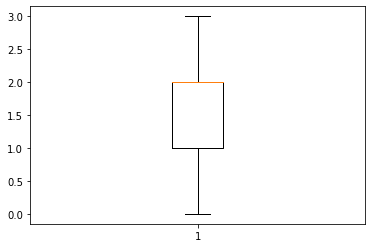


HalfBath
-----------


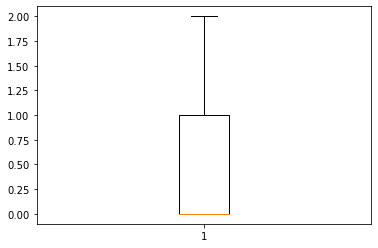


BedroomAbvGr
-----------


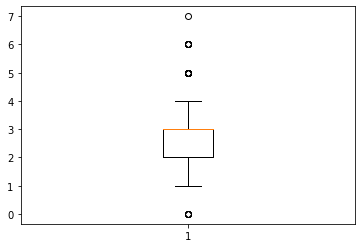


KitchenQual
-----------


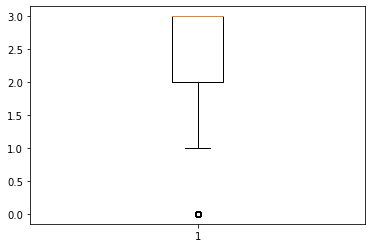


TotRmsAbvGrd
-----------


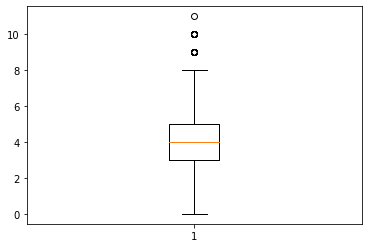


Functional
-----------


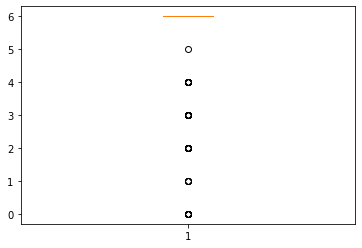


Fireplaces
-----------


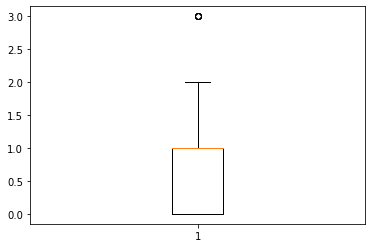


FireplaceQu
-----------


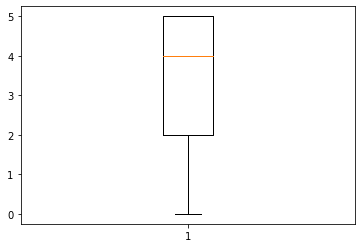


GarageType
-----------


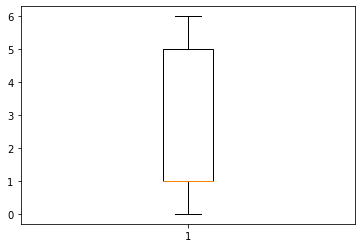


GarageYrBlt
-----------


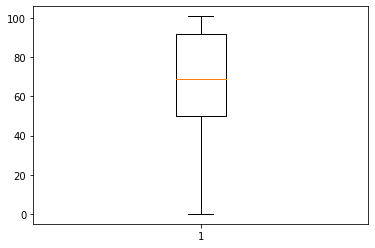


GarageFinish
-----------


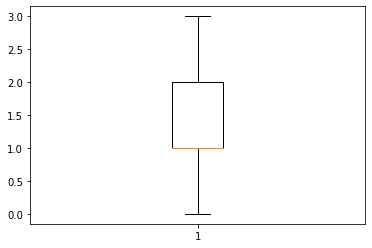


GarageCars
-----------


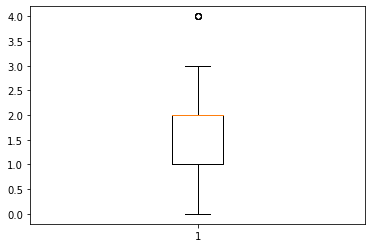


GarageArea
-----------


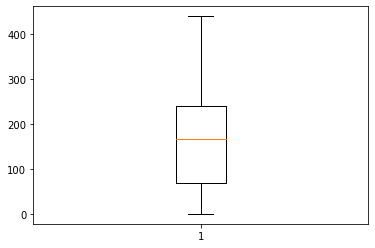


GarageQual
-----------


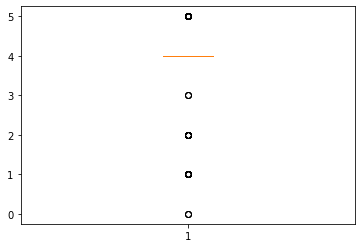


GarageCond
-----------


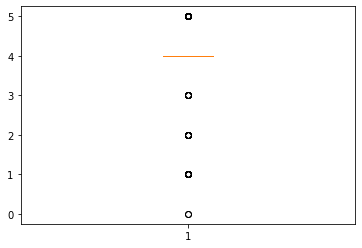


PavedDrive
-----------


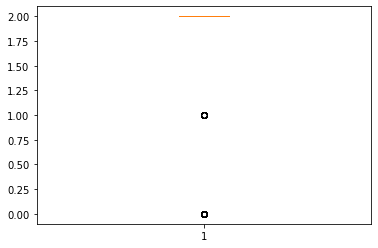


WoodDeckSF
-----------


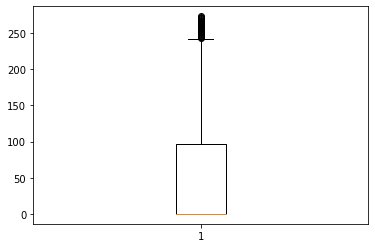


OpenPorchSF
-----------


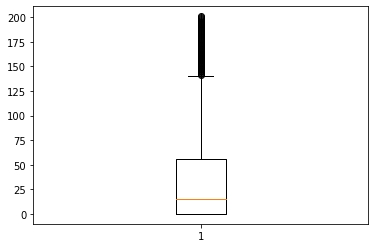


EnclosedPorch
-----------


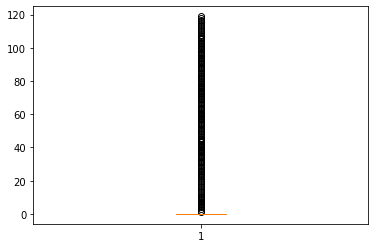


3SsnPorch
-----------


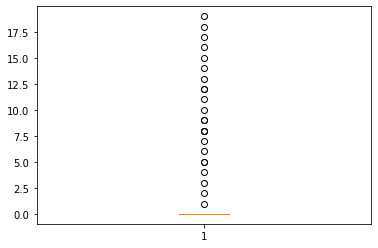


ScreenPorch
-----------


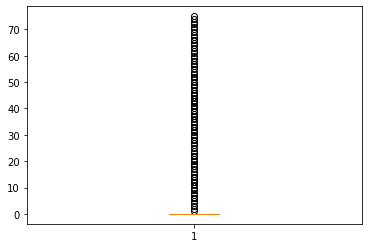


Fence
-----------


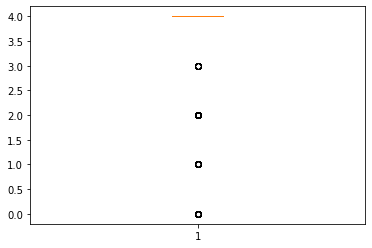


MiscFeature
-----------


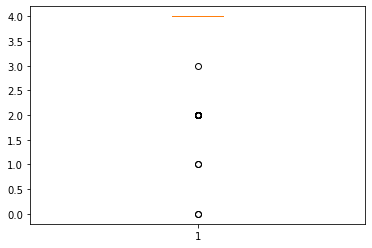


MiscVal
-----------


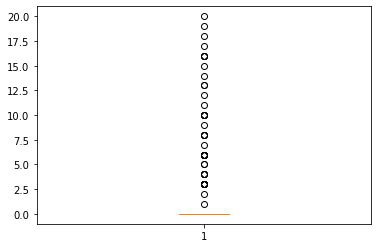


MoSold
-----------


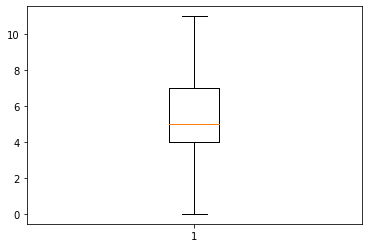


YrSold
-----------


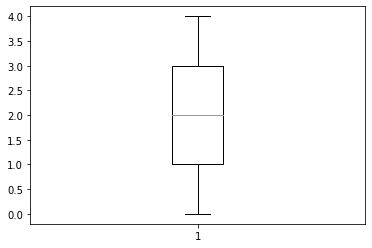


SaleType
-----------


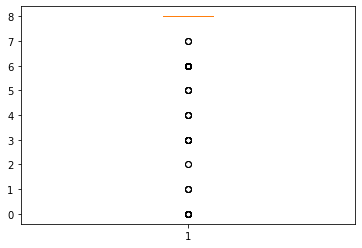


SaleCondition
-----------


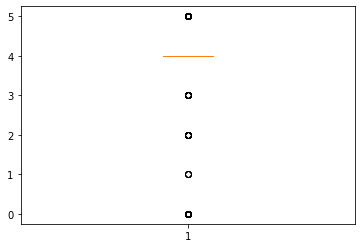


SalePrice
-----------


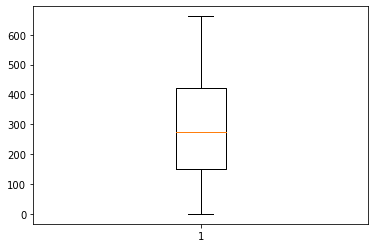

In [28]:
for i in df:
    print(i)
    print("-----------")
    plt.boxplot(df[i])
    plt.show()
    print()